In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2024_MAF3646E/Módulo 3 - Codificación de variables categóricas/'
df_paises=pd.read_csv(ruta+'Países.csv')
df_paises.head()

Países
0    MEX
1    CHN
2    CAN
3    POL
4    CPV

In [2]:
# Cardinalidad
n=len(df_paises['Países'].unique())
n

91

In [3]:
observaciones=len(df_paises)
observaciones

560

In [4]:
#@title Criterio de Pareto
# Consideramos que tenemos muchas categorías si el 80% de las observaciones se reflejan en el 20% de las categorías
0.8*observaciones,0.2*n

(448.0, 18.2)

<Axes: >

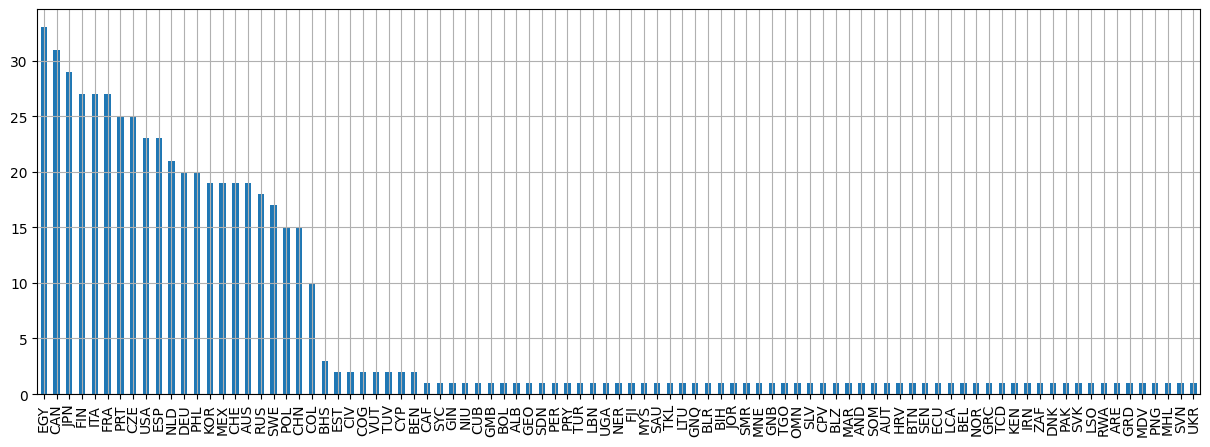

In [5]:
conteo=df_paises['Países'].value_counts()
conteo.plot.bar(figsize=(15,5),grid=True)

<Axes: >

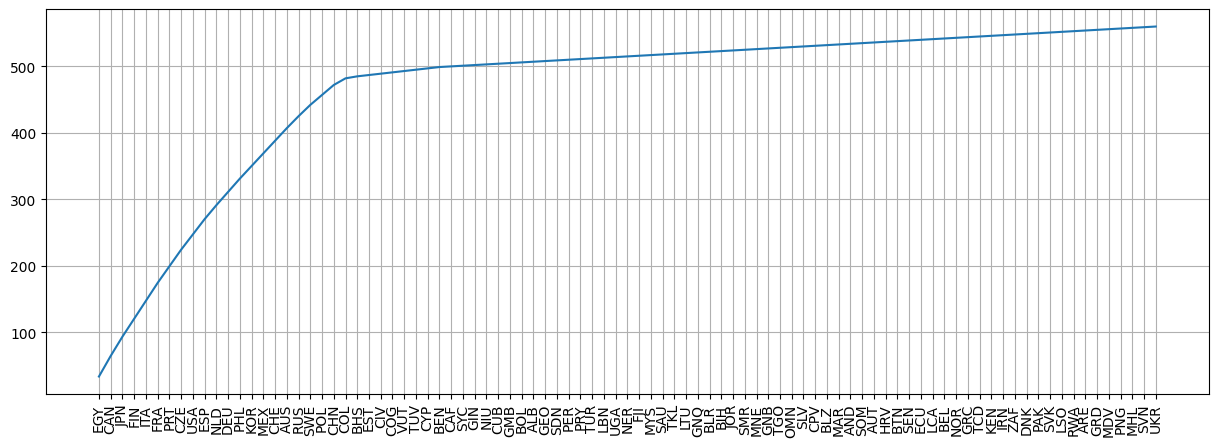

In [6]:
suma=conteo.cumsum()
suma.plot(figsize=(15,5),grid=True,xticks=range(n),rot=90)

In [7]:
np.where(suma<0.8*observaciones)[0][-1] # Las 19 categorías más numerosas se acercan al 80% de las observaciones

18

In [8]:
np.where(suma>0.8*observaciones)[0][0] # Las primeras 20 categorías superan el 80% de las observaciones

19

# Reducción de categorías (Feature Hashing)

In [ ]:
m=20 # Reducción de 91 categorías a (máximo) 20
Conjunto_paises=conteo.index # conteo.index  ->  (Orden deee... frecuencia).   # df.unique()  ->  (Orden de aparición)
keys={pais:id for pais,id in zip(Conjunto_paises,range(n))}
keys # Codificación de los países

In [ ]:
#@title Función Hash 1
#
Hash_fcn_1={pais:key%m for pais,key in keys.items()}
Hash_fcn_1

In [12]:
df_paises['Países_Hash_1']=df_paises['Países'].map(Hash_fcn_1)
len(df_paises['Países_Hash_1'].unique()) # Cardinalidad de 'Países' codificada

20

In [ ]:
#@title Función Hash 2
#
conteo[:21] # Usamos como codificación el número de apariciones de los países asociados a 'key%m'
            # key%m=0  ->  33+15+...  EGY+CHN+...

In [ ]:
contador=[0]*m
for pais,key in keys.items():
  contador[key%m] += conteo[pais]
contador

In [ ]:
Hash_fcn_2={pais:contador[key%m] for pais,key in keys.items()}
Hash_fcn_2

In [19]:
df_paises['Países_Hash_2']=df_paises['Países'].map(Hash_fcn_2)
len(df_paises['Países_Hash_2'].unique())

12

In [20]:
#@title MurMurHash3 de 32 bits
from sklearn.feature_extraction import FeatureHasher

In [21]:
hasher=FeatureHasher(m)
cod_murmurhash3=hasher.fit_transform([keys])
cod_murmurhash3.toarray()

array([[ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
         -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
         136.,  272.]])

In [ ]:
Hash_fcn_3={pais:cod_murmurhash3.toarray()[0][key%m] for pais,key in keys.items()}
Hash_fcn_3

In [30]:
df_paises['Hash_fcn_3']=df_paises['Países'].map(Hash_fcn_3)
len(df_paises['Hash_fcn_3'].unique())

20

In [ ]:
# MurMurHash3 con otra codificación
#
!pip install category-encoders

In [35]:
from category_encoders import HashingEncoder

In [ ]:
hasher_2=HashingEncoder(n_components=m,cols=['Países'])
hasher_2.fit_transform(df_paises)